# Principal Component Analysis
## Intuition
Imagine, that you have a dataset of points. Your goal is to choose orthogonal axes, that describe your data the most informative way. To be precise, we choose first axis in such a way, that maximize the variance (expressiveness) of the projected data. All the following axes have to be orthogonal to the previously chosen ones, while satisfy largest possible variance of the projections. 

Let's take a look at the simple 2d data. We have a set of blue points on the plane. We can easily see that the projections on the first axis (red dots) have maximum variance at the final position of the animation. The second (and the last) axis should  be orthogonal to the previous one.
![](https://i.stack.imgur.com/lNHqt.gif)
[source](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)

This idea could be used in a variety ways. For example, it might happen, that projection of complex data on the principal plane (only 2 components) bring you enough intuition for clustering. The picture below plots projection of the labeled dataset onto the first to principal components (PC's), we can clearly see, that only two vectors (these PC's) would be enogh to differ Finnish people from Italian in particular dataset (celiac disease (Dubois et al. 2010))
![](https://nla.skoltech.ru/files/pca_example.png)
[source](https://privefl.github.io/bigsnpr/articles/how-to-PCA.html)

## Problem
The first component should be defined in order to maximize variance, i.e. the sum of all squared projections of data points to our vector ${\mathbf  {w}}_{{(1)}}$, which implies the following optimization problem:
$$
{\mathbf  {w}}_{{(1)}}={\underset  {\Vert {\mathbf  {w}}\Vert =1}{\operatorname {\arg \,max}}}\,\left\{\sum _{i}\left({\mathbf  {a}}_{{(i)}}\cdot {\mathbf  {w}}\right)^{2}\right\}
$$

or

$$
 \mathbf {w} _{(1)}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\{\Vert \mathbf {Aw} \Vert ^{2}\}={\underset {\Vert \mathbf {w} \Vert =1}{\operatorname {\arg \,max} }}\,\left\{\mathbf {w} ^{\top}\mathbf {A^{\top}} \mathbf {Aw} \right\}
$$

since we are looking for the unit vector, we can reformulate the problem:

$$
{\displaystyle \mathbf {w} _{(1)}={\operatorname {\arg \,max} }\,\left\{{\frac {\mathbf {w} ^{\top}\mathbf {A^{\top}} \mathbf {Aw} }{\mathbf {w} ^{\top}\mathbf {w} }}\right\}}
$$

It is [known](https://en.wikipedia.org/wiki/Rayleigh_quotient), that for positive semidefinite matrix $A^\top A$ such vector is nothing else, but eigenvector of $A^\top A$, which corresponds to the largest eigenvalue. The following components will give you the same results (eigenvectors).

So, we can conclude, that the following mapping:

$$
\underset{n \times k}{\Pi} = \underset{n \times d}{A} \cdot \underset{d \times k}{W} 
$$

describes the projection of data onto the $k$ principal components, where $W$ contains first (by the size of eigenvalues) $k$ eigenvectors of $A^\top A$.

Now we'll briefly derive how SVD decomposition could lead us to the PCA.

Firstly, we write down SVD decomposition of our matrix:

$$
A = U \Sigma W^\top
$$

and to its transpose:

$$
\begin{align}
A^\top
&= (U \Sigma W^\top)^\top \\
&= (W^\top)^\top \Sigma^\top U^\top \\
&= W \Sigma^\top U^\top \\
&= W \Sigma U^\top
\end{align}
$$

Then, consider matrix $A A^\top$:

$$
\begin{align}
A^\top A
&= (W \Sigma U^\top)(U \Sigma V^\top)  \\
&= W \Sigma I \Sigma W^\top \\
&= W \Sigma \Sigma W^\top \\
&= W \Sigma^2 W^\top
\end{align}
$$

Which corresponds to the eigendecomposition of matrix $A^\top A$, where $W$ stands for the matrix of eigenvectors of $A^\top A$, while $\Sigma^2$ contains eigenvalues of $A^\top A$.

At the end:
$$
\begin{align}
\Pi &= A \cdot W =\\
 &= U \Sigma W^\top W = U \Sigma
\end{align}
$$

The latter formula provide us with easy way to compute PCA via SVD with any number of principal components:
$$
\Pi_r = U_r \Sigma_r
$$

## Example. Iris dataset
Consider the classical Iris dataset
![](https://sebastianraschka.com/images/blog/2015/principal_component_analysis_files/iris.png)
[source](https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)

We have the dataset matrix $A \in \mathbb{R}^{150 \times 4}$

In [108]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris        = load_iris()
A           = iris['data']
labels      = iris['target']
classes     = iris['target_names']
label_names = np.array([classes[label] for label in labels])
colours     = ['red', 'blue', 'green']
print('🤖: Dataset contains {} points in {}-dimensional space'.format(*A.shape))

🤖: Dataset contains 150 points in 4-dimensional space


In [53]:
# Data normalization with zero mean and unit variance
A_std = StandardScaler().fit_transform(A)

u,s,v = np.linalg.svd(A_std)

[]

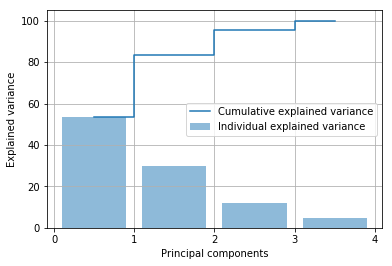

In [54]:
total_variance = sum(s)
variance_explained = [(i / total_variance)*100 for i in sorted(s, reverse=True)]
cumulative_variance_explained = np.cumsum(variance_explained)

xs = [0.5 + i for i in range(4)]
plt.bar(xs, variance_explained, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(xs, cumulative_variance_explained, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.xticks([0,1,2,3,4])
plt.grid()
plt.plot()

In [118]:
rank = 2
projections = u[:,:rank] @ np.diag(s[:rank])

setosa red
versicolor blue
virginica green


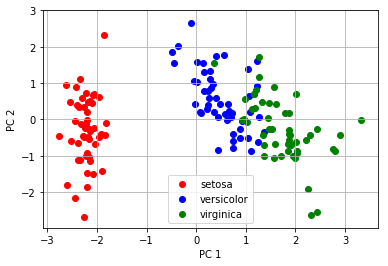

In [119]:
for label, colour in zip(classes, colours):
    print(label, colour)
    plt.scatter(projections[label_names == label, 0],
                projections[label_names == label, 1],
                label = label,
                c = colour)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower center')
plt.grid()
plt.show()

## Related materials
* [Wikipedia](https://en.wikipedia.org/wiki/Principal_component_analysis)